554.2171667539515
[[800.01821126]]
800.0182112602828


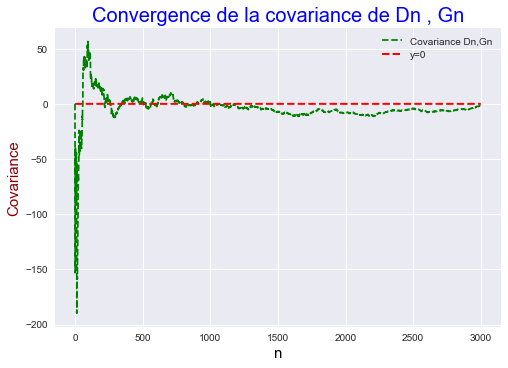

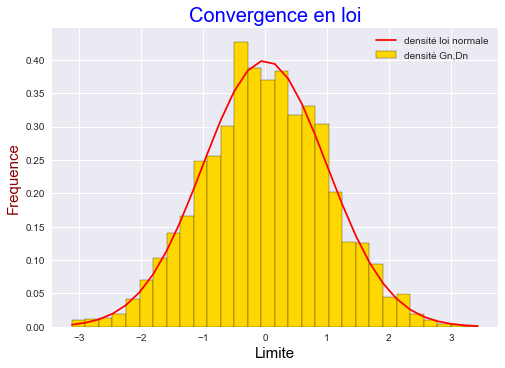

In [16]:
from numpy import *
from random import *
from scipy.stats import binom
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import scipy.stats
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d

##Pour simuler Dn

def simulate_loi_d(N):
    tab =[]
    D=np.zeros(N+1)
    D[0]=0
    D[1]=0
    for i in range(2,(N+1)):
       p =((i-1)-D[i-1])/(i)
       B=np.random. binomial (1,p,1)
       D[i]=D[i-1]+B
    
    return D[N]


##Pour simuler Gn

def simulate_loi_g(N):
    G=np.zeros(N+1)
    G[0]=0
    G[1]=0
    G[2]=1
    

    for i in range(3,N+1):
        g2=((i-2)-G[i-1])/i
        g1=2/i
        g0=G[i-1]/i
        
        
        nbaleatoire=random()
        if(nbaleatoire<=g0):
            G[i]=G[i-1]
        ##gauche
        elif(nbaleatoire<=(g0+g1)):
            G[i]=G[i-1]+1
        ##haut
        elif(nbaleatoire<=(g0+g1+g2)):
            G[i]=G[i-1]+2
        
    return G[N]

#Tableau utile

tab_loi=[]
tab_carre=[]
tab2_loi=[]
tab_cord=[]
t=[]

#Fonction calcul covariance , espereance , variance , matrice de covariance

tab_cov=[]
def simulate2(N,repetition):
    for i in range (1,repetition): 
        #Dn
        d=simulate_loi_d(N)
        tab_loi.append(d)
        
        #Gn
        g=simulate_loi_g(N)
        tab2_loi.append(g)
        
        #Gn^2
        g_carre=g*g
        tab_carre.append(g_carre)
        
        #Dn * Gn
        cord=d*g
        tab_cord.append(cord)
        
        esp_dn=mean(tab_loi)
        esp_gn=mean(tab2_loi)
        esp=mean(tab_cord)
        cov = esp - esp_dn*esp_gn
        tab_cov.append(cov)
    
    #Cacul de Covariance
    
    esp_dn=mean(tab_loi)
    esp_gn=mean(tab2_loi)
    esp=mean(tab_cord)
    cov = esp - esp_dn*esp_gn
    
    T=linspace(1,repetition ,repetition)
    
    plt1.style.use('seaborn')
    plt1.figure()
    plt1.title("Convergence de la covariance de Dn , Gn",fontsize=20,color="blue")
    plt1.xlabel('n',fontsize=15,color="black")
    plt1.ylabel('Covariance',fontsize=15,color="darkred")
    plt1.plot (tab_cov,'g--',label="Covariance Dn,Gn")
    plt1.plot (T,0 * linspace (1 ,1 ,repetition),'r--',lw=2,label="y=0")
    plt1.legend()
    plt1.savefig('Convergence_Covariance.png')
    plt1.show
    
    #Variance Dn
    var_dn=(N+1)/12
    
    #Variance Gn
    
    var_gn=(N+8)/45  #Var supposé 
    esp_gn_carre=mean(tab_carre)
    var_gn=esp_gn_carre-(esp_gn*esp_gn) #Var reelle
    
    print(var_gn)
    # Matrice de Covariance 
    matrice = np.array([[var_dn,cov] , [cov,var_gn]])
        
    u=np.array([[1],[1]])
    
    #Calcul pour avoir une N(0,1)
    sig=np.dot(transpose(u),matrice)
    sig=np.dot(sig,u)
    print(sig)
    print(sig[0][0])
    
    for j in range (0,repetition-1):
        X=np.array([[tab_loi[j] - esp_dn],[tab2_loi[j] - esp_gn]])
        ter=np.dot(transpose(u),X)
        ter=ter/math.sqrt(sig[0][0])
        # tableau contenant les deux
        t.append(ter[0][0])
        
    # Graphique configuration
    
    plt.style.use('seaborn')
    plt.figure()
    plt.title('Convergence en loi',fontsize=20,color="blue")
    n, bins, patches = plt.hist(t, 30, density=1, facecolor='gold',edgecolor="black",label="densité Gn,Dn")
    y=scipy.stats.norm.pdf(bins, 0, 1 )
    plt.plot(bins, y,'r',label="densité loi normale")
    plt.xlabel('Limite',fontsize=15,color="black")
    plt.ylabel('Frequence',fontsize=15,color="darkred")
    plt.legend()
    plt.savefig('Convergence_en_loi_GnDn.png')
    plt.show() 
    
simulate2(3000,3000)
    
   